# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [4]:
import pandas as pd
import numpy as np

# For ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine learning Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Machine learning model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle



In [5]:
df=pd.read_csv("data/DDos.csv")

In [6]:
df.head(3)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [7]:
# Remove the spaces before the column names
df.columns = df.columns.str.strip()

In [8]:
#Unique values in the Label target column
df.loc[:,'Label'].unique()

array(['BENIGN', 'DDoS', nan], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66237 entries, 0 to 66236
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination Port             66237 non-null  int64  
 1   Flow Duration                66237 non-null  int64  
 2   Total Fwd Packets            66237 non-null  int64  
 3   Total Backward Packets       66237 non-null  int64  
 4   Total Length of Fwd Packets  66237 non-null  int64  
 5   Total Length of Bwd Packets  66237 non-null  int64  
 6   Fwd Packet Length Max        66237 non-null  int64  
 7   Fwd Packet Length Min        66237 non-null  int64  
 8   Fwd Packet Length Mean       66237 non-null  float64
 9   Fwd Packet Length Std        66237 non-null  float64
 10  Bwd Packet Length Max        66237 non-null  int64  
 11  Bwd Packet Length Min        66237 non-null  int64  
 12  Bwd Packet Length Mean       66237 non-null  float64
 13  Bwd Packet Lengt

In [10]:
## Removing the null values
data_f=df.dropna()

In [11]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66236 entries, 0 to 66235
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination Port             66236 non-null  int64  
 1   Flow Duration                66236 non-null  int64  
 2   Total Fwd Packets            66236 non-null  int64  
 3   Total Backward Packets       66236 non-null  int64  
 4   Total Length of Fwd Packets  66236 non-null  int64  
 5   Total Length of Bwd Packets  66236 non-null  int64  
 6   Fwd Packet Length Max        66236 non-null  int64  
 7   Fwd Packet Length Min        66236 non-null  int64  
 8   Fwd Packet Length Mean       66236 non-null  float64
 9   Fwd Packet Length Std        66236 non-null  float64
 10  Bwd Packet Length Max        66236 non-null  int64  
 11  Bwd Packet Length Min        66236 non-null  int64  
 12  Bwd Packet Length Mean       66236 non-null  float64
 13  Bwd Packet Length Std

In [12]:
#pd.set_option('use_inf_as_na', True)  # Treat inf as NaN
data_f = data_f.replace([np.inf, -np.inf], np.nan)
null_values=data_f.isnull().sum()  # Check for NaN values

In [13]:
null_values

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 79, dtype: int64

In [14]:
# To know the data types of the columns

(data_f.dtypes=='object')

Destination Port               False
Flow Duration                  False
Total Fwd Packets              False
Total Backward Packets         False
Total Length of Fwd Packets    False
                               ...  
Idle Mean                      False
Idle Std                       False
Idle Max                       False
Idle Min                       False
Label                           True
Length: 79, dtype: bool

In [15]:
# Convert the labels in the DataFrame to numerical values
data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1})

In [16]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,66237.000000,6.623700e+04,66237.000000,66237.000000,66237.000000,6.623700e+04,66237.000000,66237.000000,66237.000000,66237.000000,...,66236.000000,66236.000000,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04
mean,6454.605553,1.388736e+07,5.180262,5.119223,695.622567,6.716837e+03,351.442064,23.465797,110.715335,135.438642,...,3.447793,22.101455,1.585840e+05,2.020972e+04,1.949634e+05,1.470892e+05,8.153964e+06,2.602819e+06,9.997795e+06,6.297389e+06
std,16710.894455,2.815843e+07,16.873659,23.797124,3230.046907,4.222698e+04,1435.510506,136.608403,400.376692,613.421563,...,13.108006,4.844533,8.489147e+05,3.050515e+05,1.028144e+06,8.214214e+05,1.804617e+07,9.841559e+06,2.187645e+07,1.642701e+07
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.000000,4.995600e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,9.949050e+05,3.000000,4.000000,30.000000,2.020000e+02,20.000000,0.000000,8.666667,0.000000,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.000000,7.639831e+06,5.000000,5.000000,64.000000,1.160100e+04,38.000000,6.000000,35.000000,10.263203,...,4.000000,20.000000,1.005000e+03,0.000000e+00,1.005000e+03,1.005000e+03,7.410306e+06,0.000000e+00,7.415575e+06,6.526832e+06
max,61538.000000,1.199983e+08,1681.000000,2942.000000,120783.000000,4.991419e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1680.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


In [17]:
# Split data into features and target variable
X = data_f.drop('Label', axis=1)
y = data_f['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [18]:
print("The train dataset size = ",X_train.shape)
print("The test dataset size = ",X_test.shape)

The train dataset size =  (46365, 78)
The test dataset size =  (19871, 78)


In [21]:
# Function to generate and display a detailed confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [19]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [20]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print('\nRandom Forest Metrics:')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')


Random Forest Metrics:
Accuracy: 0.9995
F1 Score: 0.9995
Precision: 1.0000
Recall: 0.9990


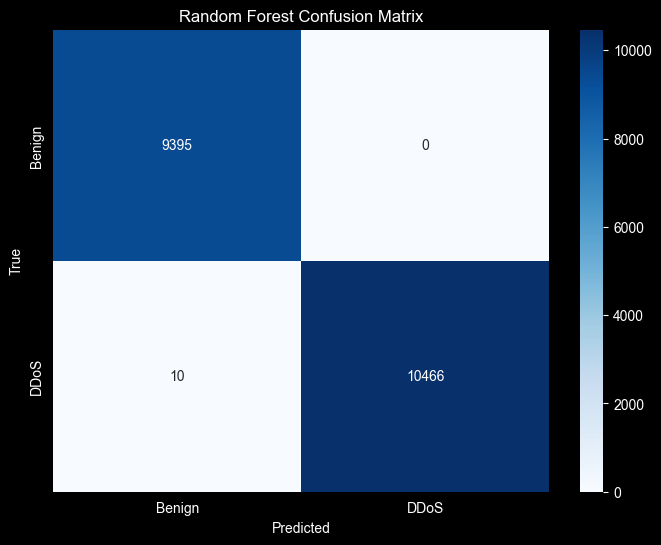

In [22]:
# Confusion Matrix for Random Forest
plot_confusion_matrix(y_test, rf_pred, ['Benign', 'DDoS'], 'Random Forest Confusion Matrix')

In [24]:
lr_model = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

C:\Users\Saranraj\PycharmProjects\JupyterProject\ML_Project\DDOS_Attack_classification\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)

In [26]:
print('\nLogistic Regression Metrics:')
print(f'Accuracy: {lr_accuracy:.4f}')
print(f'F1 Score: {lr_f1:.4f}')
print(f'Precision: {lr_precision:.4f}')
print(f'Recall: {lr_recall:.4f}')


Logistic Regression Metrics:
Accuracy: 0.9431
F1 Score: 0.9481
Precision: 0.9135
Recall: 0.9854


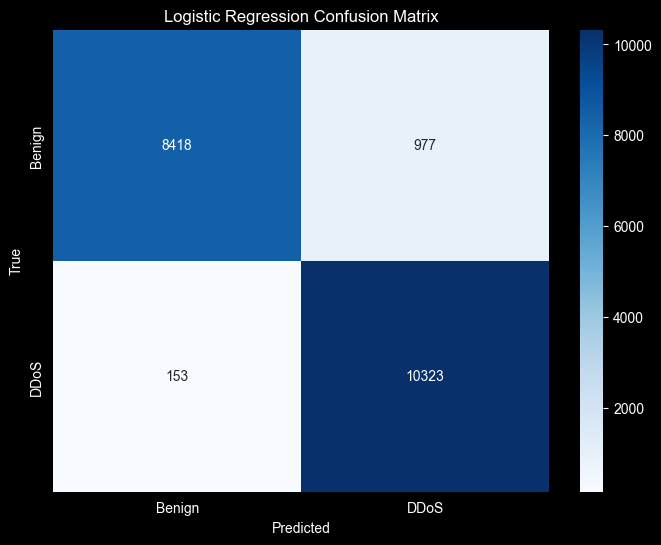

In [27]:
# Confusion Matrix for Logistic Regression
plot_confusion_matrix(y_test, lr_pred, ['Benign', 'DDoS'], 'Logistic Regression Confusion Matrix')

In [28]:
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10, random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)

C:\Users\Saranraj\PycharmProjects\JupyterProject\ML_Project\DDOS_Attack_classification\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred)
nn_recall = recall_score(y_test, nn_pred)

In [30]:
print('\nNeural Network Metrics:')
print(f'Accuracy: {nn_accuracy:.4f}')
print(f'F1 Score: {nn_f1:.4f}')
print(f'Precision: {nn_precision:.4f}')
print(f'Recall: {nn_recall:.4f}')


Neural Network Metrics:
Accuracy: 0.9827
F1 Score: 0.9837
Precision: 0.9760
Recall: 0.9915


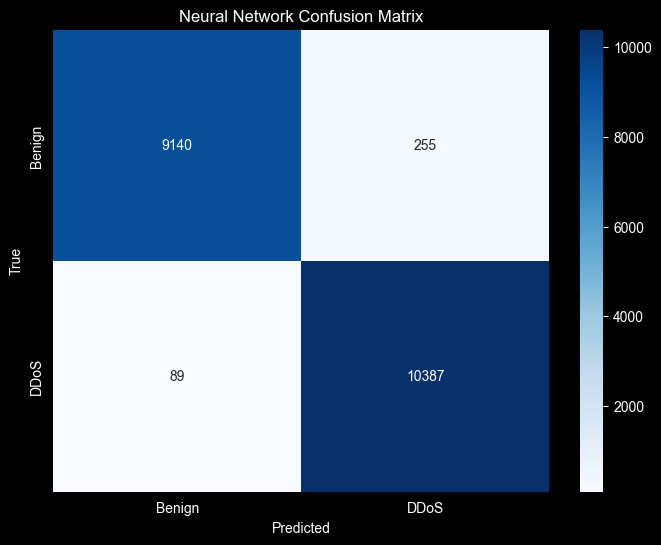

In [31]:
# Confusion Matrix for Neural Network
plot_confusion_matrix(y_test, nn_pred, ['Benign', 'DDoS'], 'Neural Network Confusion Matrix')